In [ ]:
import json  # Importa il modulo json per la gestione di dati in formato JSON
import pandas as pd  # Importa pandas per la manipolazione dei dati
import matplotlib.pyplot as plt  # Importa matplotlib per la creazione di grafici
import numpy as np  # Importa numpy per operazioni numeriche
from openai import OpenAI  # Importa la classe OpenAI per interagire con l'API OpenAI
from dotenv import (
    load_dotenv,
)  # Importa load_dotenv per caricare variabili d'ambiente da un file .env
import os  # Importa os per interagire con il sistema operativo
import seaborn as sns  # Importa seaborn per la visualizzazione dei dati (non usato nel codice)
from io import (
    StringIO,
)  # Importa StringIO per gestire stringhe come file (non usato nel codice)

# Carica le variabili d'ambiente dal file .env
load_dotenv()

# Recupera la chiave API di OpenAI dalla variabile d'ambiente
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Crea un'istanza del client OpenAI usando la chiave API
client = OpenAI(api_key=OPENAI_API_KEY)

# Definisce un dataset di esempio per il corso
sample_data = {
    "vendite": [120, 150, 180, 200, 175, 220, 195, 240, 210, 260, 245, 280],
    "mese": ["Gen","Feb","Mar","Apr","Mag","Giu","Lug","Ago","Set","Ott","Nov","Dic",],
    "regione": ["Nord","Sud","Centro","Nord","Sud","Centro","Nord","Sud","Centro","Nord","Sud","Centro",],
    "prodotto": ["A", "B", "A", "B", "A", "B", "A", "B", "A", "B", "A", "B"],
}

# Crea un DataFrame pandas dal dataset di esempio
df = pd.DataFrame(sample_data)



In [88]:
# Funzione per analizzare i dati con pandas
def analyze_data(analysis_type, column=None, group_by=None):
    """
    Analizza i dati usando pandas
    """
    try:
        if analysis_type == "summary":
            return df.describe().to_string()  # Ritorna statistiche descrittive

        elif analysis_type == "mean":
            if column:
                return f"Media di {column}: {df[column].mean():.2f}"  # Calcola la media di una colonna
            return "Specificare la colonna per il calcolo della media"

        elif analysis_type == "group_by":
            if group_by and column:
                result = df.groupby(group_by)[
                    column
                ].mean()  # Calcola la media raggruppata
                return f"Media di {column} per {group_by}:\n{result.to_string()}"
            return "Specificare colonna e gruppo per il group by"

        elif analysis_type == "correlation":
            numeric_cols = df.select_dtypes(
                include=[np.number]
            ).columns.tolist()  # Trova colonne numeriche
            if len(numeric_cols) > 1:
                corr_matrix = df[
                    numeric_cols
                ].corr()  # Calcola la matrice di correlazione
                return f"Matrice di correlazione:\n{corr_matrix.to_string()}"
            return "Non ci sono abbastanza colonne numeriche per la correlazione"

        else:
            return "Tipo di analisi non supportato"

    except Exception as e:
        return f"Errore nell'analisi: {str(e)}"

In [104]:
# Funzione per creare grafici con matplotlib
def create_plot(plot_type, x_column=None, y_column=None, title="Grafico"):
    """
    Crea grafici usando matplotlib
    """
    try:
        plt.figure(figsize=(10, 6))  # Imposta la dimensione della figura

        if plot_type == "line":
            if x_column and y_column:
                plt.plot(
                    df[x_column], df[y_column], marker="o", linewidth=2, markersize=8
                )  # Crea un grafico a linea
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.title(title)
                plt.grid(True, alpha=0.3)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig(
                    f"grafico_linea_{x_column}_{y_column}.png",
                    dpi=300,
                    bbox_inches="tight",
                )  # Salva il grafico come file PNG
                plt.show()
                return f"Grafico a linea creato: {x_column} vs {y_column}"
            return "Specificare colonne x e y per il grafico a linea"

        elif plot_type == "bar":
            if x_column and y_column:
                plt.bar(
                    df[x_column], df[y_column], color="skyblue", alpha=0.7
                )  # Crea un grafico a barre
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.title(title)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig(
                    f"grafico_barre_{x_column}_{y_column}.png",
                    dpi=300,
                    bbox_inches="tight",
                )
                plt.show()
                return f"Grafico a barre creato: {x_column} vs {y_column}"
            return "Specificare colonne x e y per il grafico a barre"

        elif plot_type == "histogram":
            if x_column:
                plt.hist(
                    df[x_column],
                    bins=10,
                    alpha=0.7,
                    color="lightgreen",
                    edgecolor="black",
                )  # Crea un istogramma
                plt.xlabel(x_column)
                plt.ylabel("Frequenza")
                plt.title(f"Istogramma di {x_column}")
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.savefig(f"istogramma_{x_column}.png", dpi=300, bbox_inches="tight")
                plt.show()
                return f"Istogramma creato per {x_column}"
            return "Specificare la colonna per l'istogramma"

        elif plot_type == "scatter":
            if x_column and y_column:
                plt.scatter(
                    df[x_column], df[y_column], alpha=0.6, s=100
                )  # Crea uno scatter plot
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.title(title)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.savefig(
                    f"scatter_{x_column}_{y_column}.png", dpi=300, bbox_inches="tight"
                )
                plt.show()
                return f"Scatter plot creato: {x_column} vs {y_column}"
            return "Specificare colonne x e y per lo scatter plot"
        
        elif plot_type == "boxplot":
            if x_column and y_column:
                sns.boxplot(x=df[x_column], y=df[y_column], hue=df[x_column], legend=False, palette="Set2")  # Crea un boxplot
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.title(f"Boxplot di {y_column} per {x_column}")
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.savefig(
                    f"boxplot_{x_column}_{y_column}.png", dpi=300, bbox_inches="tight"
                )
                plt.show()
                return f"Boxplot creato: {x_column} vs {y_column}"
            return "Specificare colonne x e y per il boxplot"

        else:
            return "Tipo di grafico non supportato"

    except Exception as e:
        return f"Errore nella creazione del grafico: {str(e)}"

In [90]:
# Funzione per gestire le chiamate agli strumenti
def function_calling(tool_calls):
    results = []

    for tool_call in tool_calls:
        if tool_call.function.name == "analyze_data":
            args = json.loads(tool_call.function.arguments)
            result = analyze_data(args.get("analysis_type"))
            results.append(result)

        elif tool_call.function.name == "analyze_data_with_column":
            args = json.loads(tool_call.function.arguments)
            result = analyze_data(
                args.get("analysis_type"), args.get("column"), args.get("group_by")
            )
            results.append(result)

        elif tool_call.function.name == "create_plot":
            args = json.loads(tool_call.function.arguments)
            result = create_plot(
                args.get("plot_type"),
                args.get("x_column"),
                args.get("y_column"),
                args.get("title"),
            )
            results.append(result)

        elif tool_call.function.name == "create_histogram":
            args = json.loads(tool_call.function.arguments)
            result = create_plot(
                "histogram", args.get("column"), None, args.get("title")
            )
            results.append(result)

        elif tool_call.function.name == "show_data":
            args = json.loads(tool_call.function.arguments)
            rows = args.get("rows", 5)
            if rows == -1:
                result = f"Dataset completo:\n{df.to_string()}"
            else:
                result = f"Prime {rows} righe del dataset:\n{df.head(rows).to_string()}"
            results.append(result)

    return "\n\n".join(results)  # Restituisce i risultati concatenati

In [102]:
# Definizione degli strumenti disponibili per l'API OpenAI
tools = [
    {
        "type": "function",
        "function": {
            "name": "analyze_data",
            "description": "Analizza i dati usando pandas. Supporta: summary, mean, group_by, correlation",
            "parameters": {
                "type": "object",
                "properties": {
                    "analysis_type": {
                        "type": "string",
                        "enum": ["summary", "mean", "group_by", "correlation"],
                        "description": "Tipo di analisi da eseguire",
                    }
                },
                "required": ["analysis_type"],
                "additionalProperties": False,
            },
            "strict": True,
        },
    },
    {
        "type": "function",
        "function": {
            "name": "analyze_data_with_column",
            "description": "Analizza i dati con una colonna specifica (per mean e group_by)",
            "parameters": {
                "type": "object",
                "properties": {
                    "analysis_type": {
                        "type": "string",
                        "enum": ["mean", "group_by"],
                        "description": "Tipo di analisi da eseguire",
                    },
                    "column": {
                        "type": "string",
                        "description": "Nome della colonna da analizzare",
                    },
                    "group_by": {
                        "type": "string",
                        "description": "Colonna per il raggruppamento (solo per group_by)",
                    },
                },
                "required": ["analysis_type", "column", "group_by"],
                "additionalProperties": False,
            },
            "strict": True,
        },
    },
    {
        "type": "function",
        "function": {
            "name": "create_plot",
            "description": "Crea grafici usando matplotlib. Supporta: line, bar, histogram, scatter, box",
            "parameters": {
                "type": "object",
                "properties": {
                    "plot_type": {
                        "type": "string",
                        "enum": ["line", "bar", "histogram", "scatter", "boxplot"],
                        "description": "Tipo di grafico da creare",
                    },
                    "x_column": {
                        "type": "string",
                        "description": "Nome della colonna per l'asse x",
                    },
                    "y_column": {
                        "type": "string",
                        "description": "Nome della colonna per l'asse y",
                    },
                    "title": {"type": "string", "description": "Titolo del grafico"},
                },
                "required": ["plot_type", "x_column", "y_column", "title"],
                "additionalProperties": False,
            },
            "strict": True,
        },
    },
    {
        "type": "function",
        "function": {
            "name": "create_histogram",
            "description": "Crea un istogramma per una singola colonna",
            "parameters": {
                "type": "object",
                "properties": {
                    "column": {
                        "type": "string",
                        "description": "Nome della colonna per l'istogramma",
                    },
                    "title": {"type": "string", "description": "Titolo del grafico"},
                },
                "required": ["column", "title"],
                "additionalProperties": False,
            },
            "strict": True,
        },
    },
    {
        "type": "function",
        "function": {
            "name": "show_data",
            "description": "Mostra i dati del dataset",
            "parameters": {
                "type": "object",
                "properties": {
                    "rows": {
                        "type": "integer",
                        "description": "Numero di righe da mostrare (-1 per tutto il dataset)",
                    }
                },
                "required": ["rows"],
                "additionalProperties": False,
            },
            "strict": True,
        },
    },
]


In [21]:
# Vari esempi di richieste per il corso di data analyst

print("=== CORSO DATA ANALYST - ESEMPI ===\n")

# Esempio 1: Analisi esplorativa
print("1. ANALISI ESPLORATIVA")
response1 = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "user",
            "content": "Mostra le prime 5 righe del dataset e fai un'analisi summary dei dati",
        }
    ],
    tools=tools,
    tool_choice="auto",
)

if response1.choices[0].message.tool_calls:
    print(function_calling(response1.choices[0].message.tool_calls))

print("\n" + "=" * 50 + "\n")

=== CORSO DATA ANALYST - ESEMPI ===

1. ANALISI ESPLORATIVA
Prime 5 righe del dataset:
   vendite mese regione prodotto
0      120  Gen    Nord        A
1      150  Feb     Sud        B
2      180  Mar  Centro        A
3      200  Apr    Nord        B
4      175  Mag     Sud        A

          vendite
count   12.000000
mean   206.250000
std     46.325185
min    120.000000
25%    178.750000
50%    205.000000
75%    241.250000
max    280.000000




In [22]:
# Esempio 2: Analisi per gruppi
print("2. ANALISI PER GRUPPI")
response2 = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Calcola la media delle vendite per regione usando group_by",
        }
    ],
    tools=tools,
    tool_choice="auto",
)

if response2.choices[0].message.tool_calls:
    print(function_calling(response2.choices[0].message.tool_calls))

print("\n" + "=" * 50 + "\n")

2. ANALISI PER GRUPPI
Media di vendite per regione:
regione
Centro    222.50
Nord      193.75
Sud       202.50




3. VISUALIZZAZIONE DATI


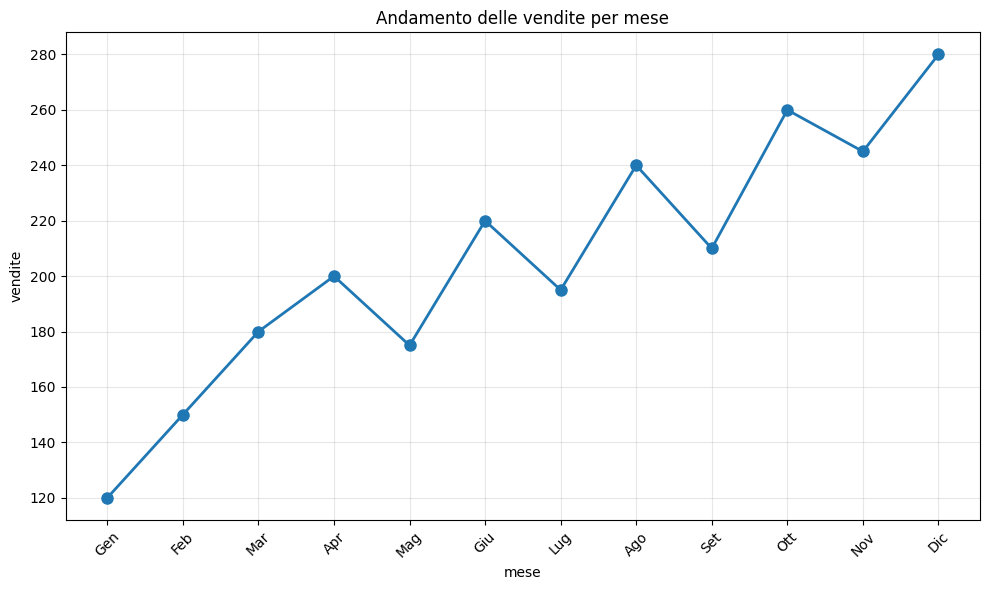

Grafico a linea creato: mese vs vendite




In [23]:
# Esempio 3: Visualizzazione
print("3. VISUALIZZAZIONE DATI")
response3 = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Crea un grafico a linea che mostri l'andamento delle vendite per mese",
        }
    ],
    tools=tools,
    tool_choice="auto",
)

if response3.choices[0].message.tool_calls:
    print(function_calling(response3.choices[0].message.tool_calls))

print("\n" + "=" * 50 + "\n")


In [24]:
# Esempio 4: Analisi correlazione
print("4. ANALISI CORRELAZIONE")
response4 = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "user",
            "content": "Calcola la matrice di correlazione tra le variabili numeriche",
        }
    ],
    tools=tools,
    tool_choice="auto",
)

if response4.choices[0].message.tool_calls:
    print(function_calling(response4.choices[0].message.tool_calls))

4. ANALISI CORRELAZIONE
Dataset completo:
    vendite mese regione prodotto
0       120  Gen    Nord        A
1       150  Feb     Sud        B
2       180  Mar  Centro        A
3       200  Apr    Nord        B
4       175  Mag     Sud        A
5       220  Giu  Centro        B
6       195  Lug    Nord        A
7       240  Ago     Sud        B
8       210  Set  Centro        A
9       260  Ott    Nord        B
10      245  Nov     Sud        A
11      280  Dic  Centro        B


##### Esercizio 1: Calcolo media vendite per prodotto: Scrivi una richiesta che chieda di calcolare la media delle vendite per ciascun prodotto a e b es. Visualizza poi un grafico a barre che confronti le due medie.

In [73]:
# Richiesta 5: calcolare la media delle vendite per ciascun prodotto. Visualizza poi un grafico a barre che confronti le due medie.
response5 = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Analizza il dataset e calcola la media delle vendite per prodotto usando group_by.",
        }
    ],
    tools=tools,
    tool_choice="auto",
)
if response5.choices[0].message.tool_calls:
    print(function_calling(response5.choices[0].message.tool_calls))

Media di vendite per prodotto:
prodotto
A    187.5
B    225.0


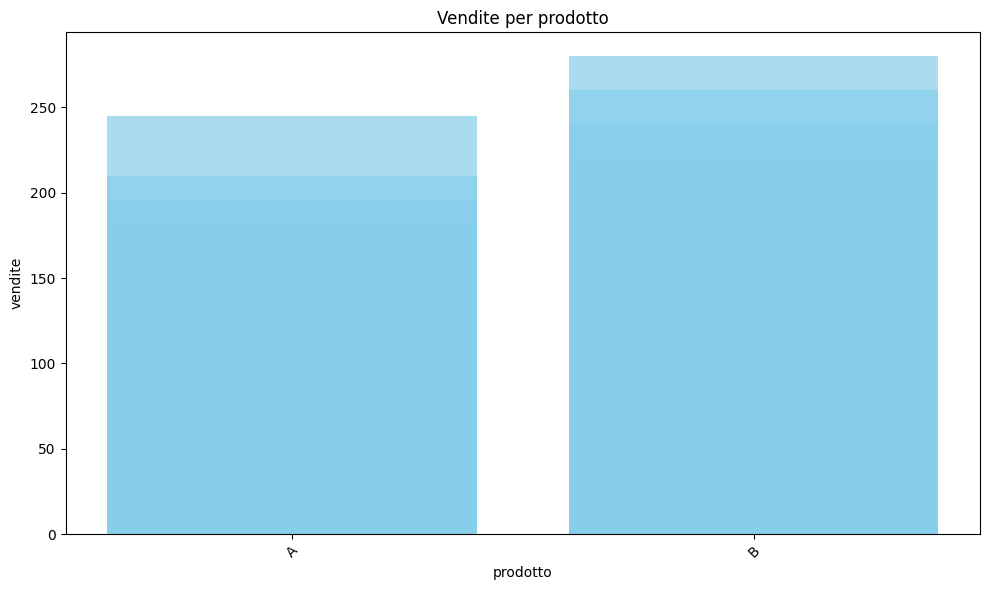

Grafico a barre creato: prodotto vs vendite


In [ ]:
# 5b genera un bar plot delle medie delle vendite per prodotto
response5b = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Crea un bar plot. Come asse x usa la colonna 'prodotto' e come asse y le vendite per prodotto.",
        }
    ],
    tools=tools,
    tool_choice="auto",
)
if response5b.choices[0].message.tool_calls:
    print(function_calling(response5b.choices[0].message.tool_calls))

##### Esercizio 2: Genera un istogramma della colonna vendite

In [77]:
# resetta il DataFrame df per evitare conflitti con le chiamate successive
df = pd.DataFrame(sample_data)



6. CREAZIONE ISTOGRAMMA


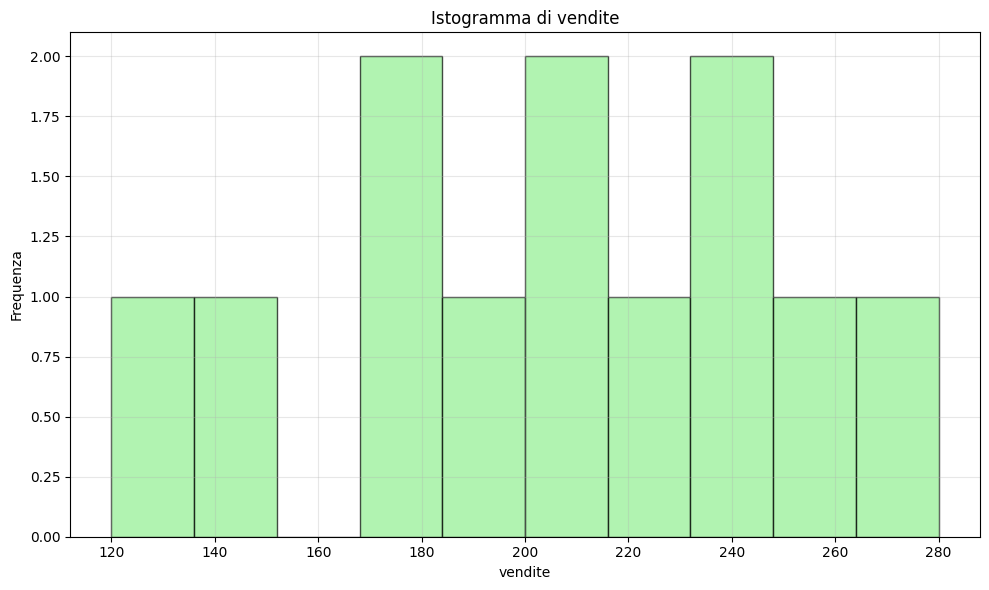

Istogramma creato per vendite




In [ ]:
# Richiesta 6: Creazione istogramma
print("\n" + "=" * 50 + "\n")
print("6. CREAZIONE ISTOGRAMMA")
response6 = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Crea un istogramma delle vendite",
        }
    ],
    tools=tools,
    tool_choice="auto",
)
if response6.choices[0].message.tool_calls:
    print(function_calling(response6.choices[0].message.tool_calls))

print("\n" + "=" * 50 + "\n")

##### Esercizio 3: Utilizza seaborn o matplotlib per creare un boxplot con regione sull'asse x e vendite sull’asse y.

7. CREAZIONE BOXPLOT


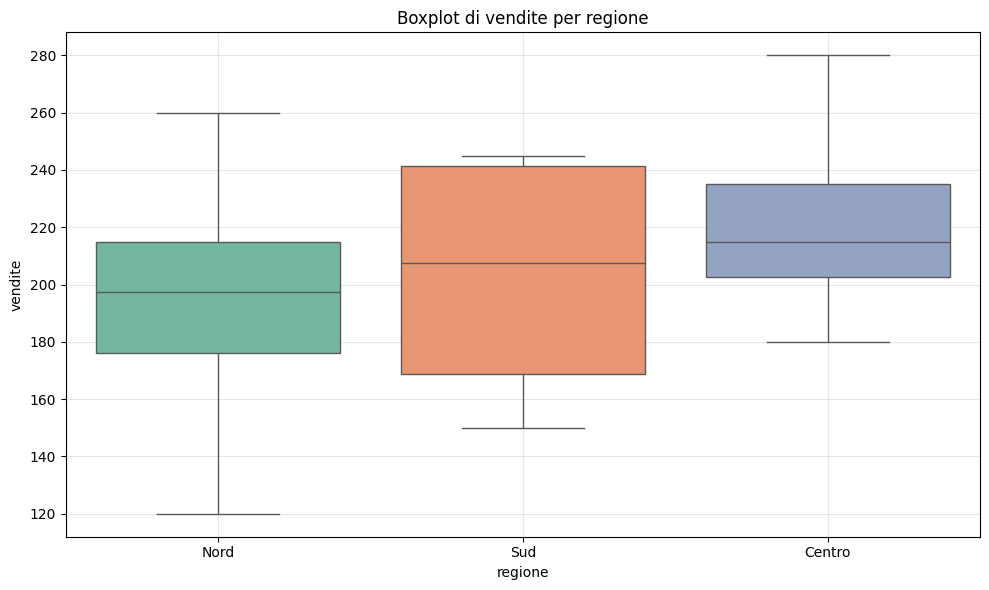

Boxplot creato: regione vs vendite




In [105]:
# Richiesta 7: Creazione boxplot
print("7. CREAZIONE BOXPLOT")
response7 = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Crea un grafico di tipo 'boxplot' con regione sull'asse x e vendite sull'asse y.",
        }
    ],
    tools=tools,
    tool_choice="auto",
)
if response7.choices[0].message.tool_calls:
    print(function_calling(response7.choices[0].message.tool_calls))

print("\n" + "=" * 50 + "\n")

### Esercizio 4: Crea uno scatter plot con vendite sull’asse y e prodotto sull’asse x.

8. CREAZIONE SCATTER PLOT


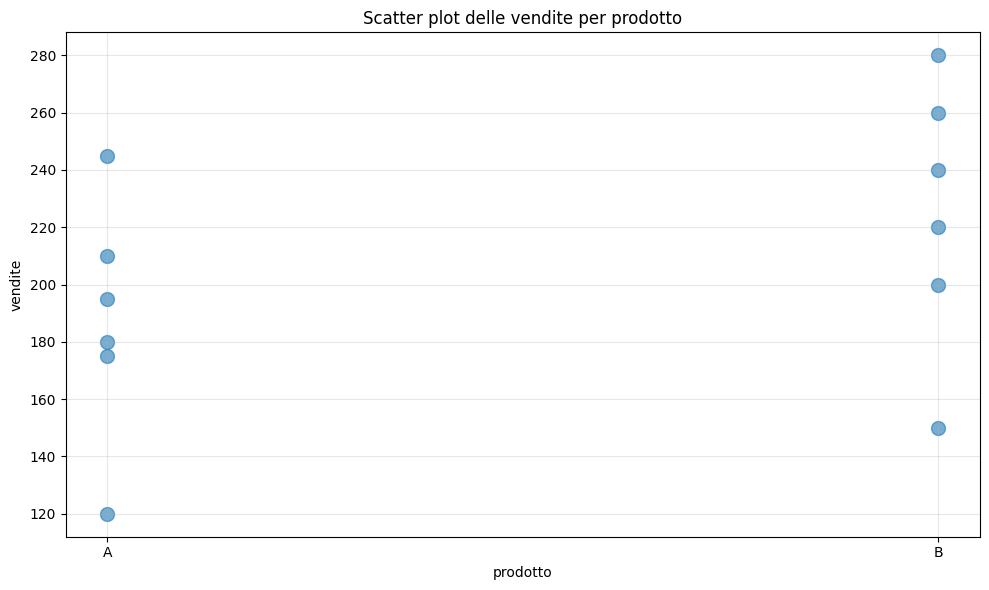

Scatter plot creato: prodotto vs vendite




In [98]:
# Richiesta 8: Creazione scatter plot
print("8. CREAZIONE SCATTER PLOT")
response8 = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": "Crea uno scatter plot con vendite sull'asse y e prodotto sull'asse x.",
        }
    ],
    tools=tools,
    tool_choice="auto",
)
if response8.choices[0].message.tool_calls:
    print(function_calling(response8.choices[0].message.tool_calls))

print("\n" + "=" * 50 + "\n")